## Introduction
This notebook explores a crop recommendation system using machine learning algorithms. It preprocesses the dataset, trains multiple models, evaluates their performance, and compares their accuracy.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Data Preprocessing

In [3]:
data = pd.read_csv("Crop_Recommendation.csv")

In [4]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [24]:
def plot_histogram(data, feature, bins=20, color='blue'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=bins, kde=True, color=color, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

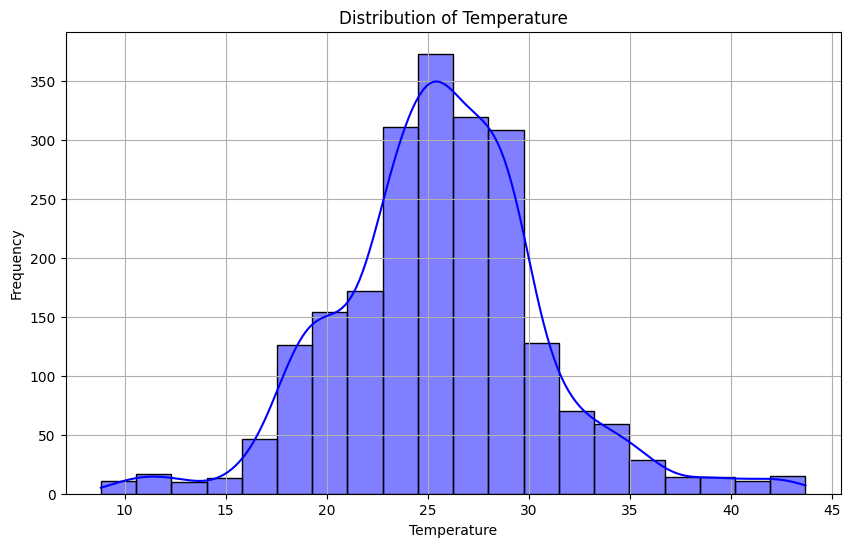

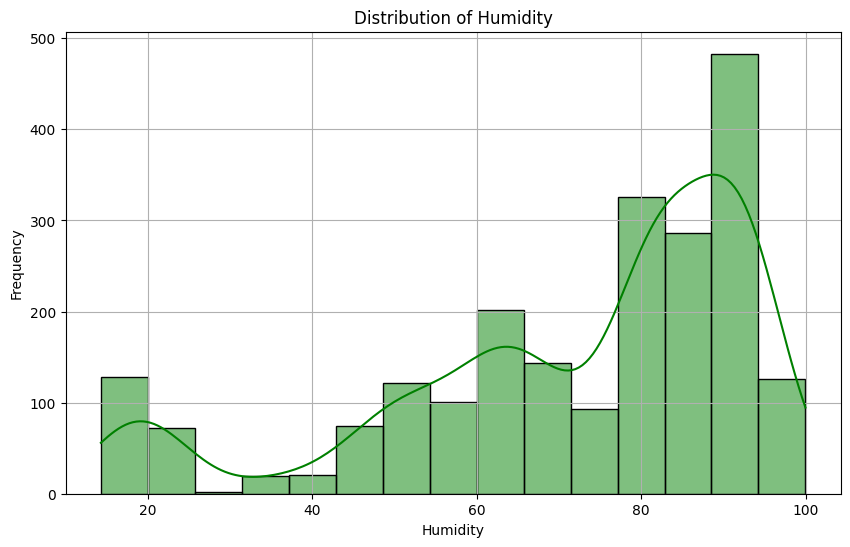

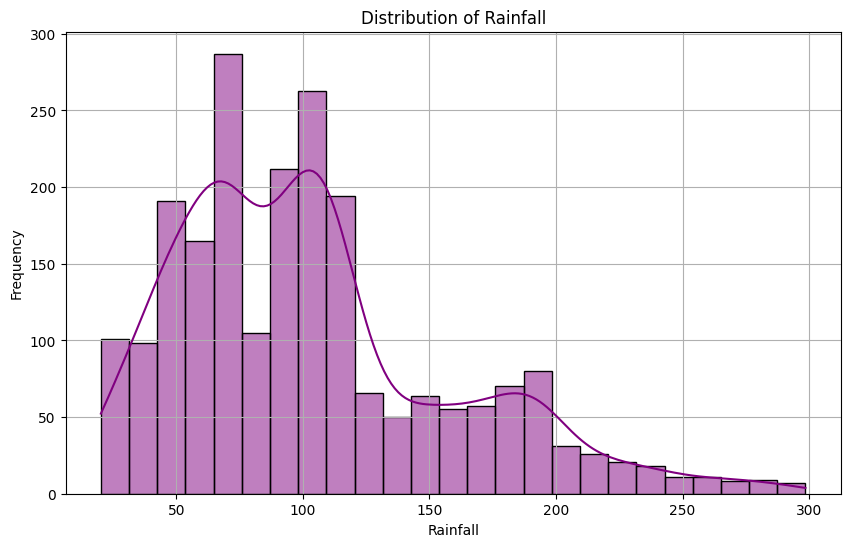

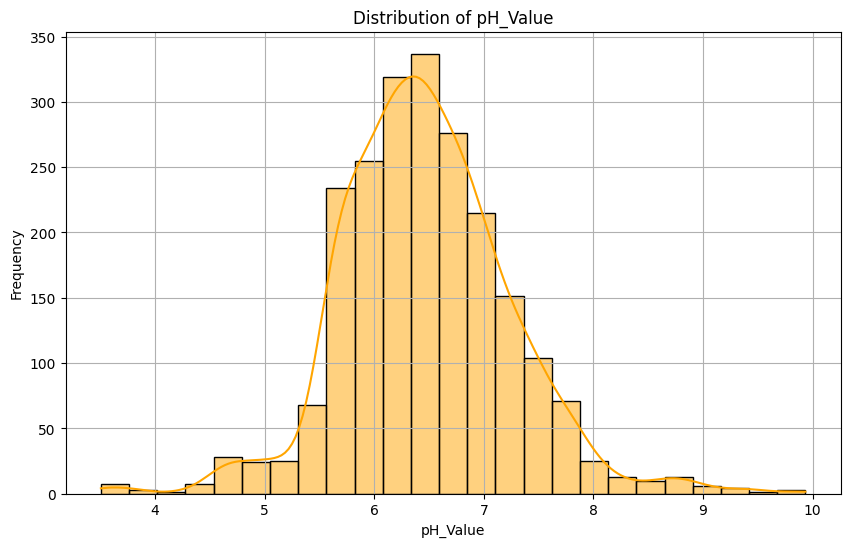

In [27]:
# Example: Plotting histograms for different features
plot_histogram(data, 'Temperature', bins=20, color='blue')
plot_histogram(data, 'Humidity', bins=15, color='green')
plot_histogram(data, 'Rainfall', bins=25, color='purple')
plot_histogram(data, 'pH_Value', bins=25, color='orange')

### Handling Missing Values

In [5]:
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [6]:
data['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

### Encoding Categorical Data

In [7]:
le = LabelEncoder()
data['Crop'] = le.fit_transform(data['Crop'])

In [8]:
data['Crop']

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: Crop, Length: 2200, dtype: int64

In [9]:
x = data.drop('Crop', axis = 1)
y = data['Crop']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Linear Regression

In [31]:
linear = LinearRegression()

linear.fit(x_train, y_train)
linear.score(x_test,y_test)

0.2734060941225821

### Logistic Regression

In [32]:
logistic = LogisticRegression()

logistic.fit(x_train, y_train)
logistic.score(x_test,y_test)

0.9613636363636363

### Decision Tree

In [33]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(x_train, y_train)
dt_classifier.score(x_test,y_test)

0.975

### XgBoost Algorithm

In [34]:
xgb_classifier = XGBClassifier()

xgb_classifier.fit(x_train, y_train)

xgb_score = xgb_classifier.score(x_test, y_test)

xgb_score

0.975

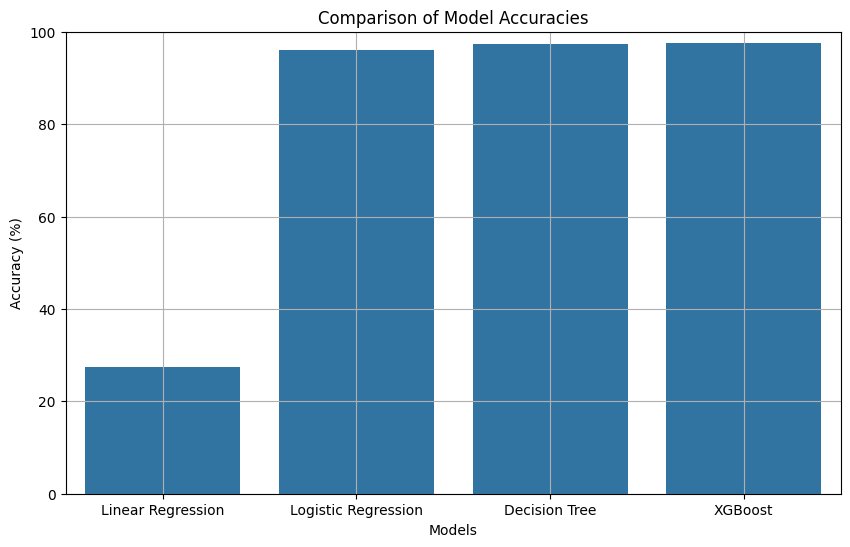

In [35]:
models = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'XGBoost']
accuracies = [27.34, 96.14, 97.27, 97.5]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 100)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()